In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

digits = datasets.load_digits()
x,y = digits.images, digits.target
print(x.shape)
print(y.shape)
print({i:len(y[y==i]) for i in range(10)})
print(digits.images.shape, digits.data.shape)

(1797, 8, 8)
(1797,)
{0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}
(1797, 8, 8) (1797, 64)


In [2]:
x[15]

array([[  0.,   5.,  12.,  13.,  16.,  16.,   2.,   0.],
       [  0.,  11.,  16.,  15.,   8.,   4.,   0.,   0.],
       [  0.,   8.,  14.,  11.,   1.,   0.,   0.,   0.],
       [  0.,   8.,  16.,  16.,  14.,   0.,   0.,   0.],
       [  0.,   1.,   6.,   6.,  16.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   5.,  16.,   3.,   0.,   0.],
       [  0.,   1.,   5.,  15.,  13.,   0.,   0.,   0.],
       [  0.,   4.,  15.,  16.,   2.,   0.,   0.,   0.]])

In [3]:
y[15]

5

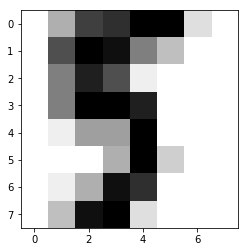

In [4]:
plt.imshow(x[15],cmap=plt.cm.gray_r)
plt.show()

In [5]:
x

array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[  0.,   0., 

In [6]:
x = x.reshape((x.shape[0],-1))

In [7]:
x

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [8]:
x.shape

(1797, 64)

In [31]:
# 訓練データと試験データに分割する
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# データの標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)# x_trainを使って標準化することに注意
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [32]:
#パーセプトロンによる手書き文字の分類
from sklearn.linear_model import Perceptron
clf = Perceptron(n_iter=10, eta0=0.01, shuffle=True)
clf.fit(x_train_std, y_train)

#正解率を表示する
y_pred = clf.predict(x_test_std)
print('誤分類サンプル数: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('正解率: %.2f' % accuracy_score(y_test, y_pred))

誤分類サンプル数: 36
正解率: 0.93


In [42]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train_std, y_train)

#正解率を表示する
y_pred = clf.predict(x_test_std)
print('誤分類サンプル数: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('正解率: %.2f' % accuracy_score(y_test, y_pred))

誤分類サンプル数: 8
正解率: 0.99


In [45]:
digits = datasets.load_digits()
x,y = digits.images, digits.target
x = x.reshape((x.shape[0],-1))

from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, x, y, scoring='accuracy', cv=10)
print(scores)
print('Accuracy: %0.2f(+/- %0.2f)' % (scores.mean(), scores.std()*2))

[ 0.93513514  0.99453552  0.9281768   0.96111111  0.96089385  0.98882682
  0.96648045  0.97752809  0.93220339  0.96590909]
Accuracy: 0.96(+/- 0.04)


In [47]:
digits = datasets.load_digits()
x,y = digits.images, digits.target
x = x.reshape((x.shape[0],-1))

from sklearn.model_selection import cross_val_score
clf = Perceptron()
scores = cross_val_score(clf, x, y, scoring='accuracy', cv=10)
print(scores)
print('Accuracy: %0.2f(+/- %0.2f)' % (scores.mean(), scores.std()*2))

[ 0.8972973   0.90163934  0.83977901  0.92222222  0.91620112  0.92178771
  0.93296089  0.92696629  0.85310734  0.88636364]
Accuracy: 0.90(+/- 0.06)


In [57]:
from sklearn.model_selection import KFold
scores = []
kf=KFold(n_splits=10)

for train,test in kf.split(x,y):
    svm=SVC(gamma=0.001)
    svm.fit(x[train],y[train])
    scores.append(svm.score(x[test],y[test]))
print(scores)
print('Accuracy: %0.2f(+/- %0.2f)' % (np.array(scores).mean(), np.array(scores).std() *2))

[0.94999999999999996, 1.0, 0.94999999999999996, 0.98888888888888893, 0.98888888888888893, 0.98888888888888893, 0.99444444444444446, 0.994413407821229, 0.97765363128491622, 0.96089385474860334]
Accuracy: 0.98(+/- 0.04)


In [63]:
?GridSearchCV 

In [62]:
digits = datasets.load_digits()
x,y = digits.images, digits.target
x = x.reshape((x.shape[0],-1))

from sklearn.model_selection import GridSearchCV
tuned_parameters={'kernel':['rbf','linear','poly','sigmoid'],
                  'gamma':[1e-2,1e-3,1e-4,1e-5],
                  'C':[1e-2,1e-1,1,10,100,1000]}
print("# Tuning hyper-parameters for %s" % score)
clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                   scoring='accuracy')
clf.fit(x, y)
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Grid scores on development set:
0.111 (+/-0.039) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.951 (+/-0.041) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
0.970 (+/-0.036) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'poly'}
0.105 (+/-0.012) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.173 (+/-0.152) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.951 (+/-0.041) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
0.952 (+/-0.059) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}
0.120 (+/-0.073) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.137 (+/-0.142) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.951 (+/-0.041) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}
0.134 (+/-0.130) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'poly'}
0.135 (+/-0.135) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.136 (+/-0.137) for {'C': 0.01, 'gamma': 1e-05, 'kernel': 'rbf'}
0.95